### Importación de Tensorflow

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### Importación de datos 

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data( )

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
y_train.shape

(60000,)

In [0]:
x_train.shape

(60000, 28, 28)

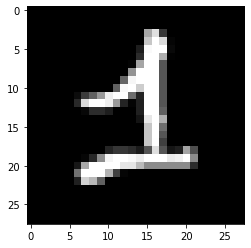

In [0]:
imagendemo=x_train[24]
plt.imshow(imagendemo,cmap='gray')

In [0]:
def image_matrix(img):
    print('\n'.join([''.join(['{:4}'.format(int(round(item*255))) for item in row]) 
      for row in img]))

In [0]:
image_matrix(imagendemo)

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0423305661014025   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   05023564770555901275   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   073956349564770647702295   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   011475647706477044370 510   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0102041820647706477021675   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   03723064770647706477021675  

Preparando los datos para el entrenamiento
 
La x debe ser convertida a un vector para que pueda ser procesada por la red perceptrón profunda 

In [0]:
x_train=x_train.reshape(-1,28*28).astype('float32')
x_test=x_test.reshape(-1,28*28).astype('float32')
x_train.shape

(60000, 784)

In [0]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
# onehot encode
onehot_encoder = OneHotEncoder(sparse=False)
y_train = y_train.reshape(len(y_train), 1)
y_train_onehot = onehot_encoder.fit_transform(y_train)

y_test = y_test.reshape(len(y_test), 1)
y_test_onehot = onehot_encoder.fit_transform(y_test)

y_train_onehot.shape

(60000, 10)

## Declarando la arquitectura -- keras secuencial

Generando función 

 


In [0]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(500, input_shape=(784,) , activation='relu'))
model1.add(tf.keras.layers.Dense(500, activation = 'relu'))
model1.add(tf.keras.layers.Dense(500, activation = 'relu'))
model1.add(tf.keras.layers.Dense(10))

Seleccionar una funcion de error, optimizador y metricas de evaluacion 

In [0]:
model1.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

## función de entrenamiento  y prueba

In [0]:
model1.fit(x=x_train, y=y_train_onehot,batch_size =100, epochs=10, validation_data=(x_test,y_test_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/sample - loss: 2.7964 - accuracy: 0.8176 - val_loss: 2.7687 - val_accuracy: 0.8195
Epoch 2/10
60000/60000 [==============================] - 2s 31us/sample - loss: 2.7683 - accuracy: 0.8195 - val_loss: 2.7687 - val_accuracy: 0.8195
Epoch 3/10
60000/60000 [==============================] - 2s 31us/sample - loss: 2.7683 - accuracy: 0.8195 - val_loss: 2.7687 - val_accuracy: 0.8195
Epoch 4/10
60000/60000 [==============================] - 2s 31us/sample - loss: 2.7683 - accuracy: 0.8195 - val_loss: 2.7687 - val_accuracy: 0.8195
Epoch 5/10
60000/60000 [==============================] - 2s 31us/sample - loss: 2.7683 - accuracy: 0.8195 - val_loss: 2.7687 - val_accuracy: 0.8195
Epoch 6/10
60000/60000 [==============================] - 2s 32us/sample - loss: 2.7683 - accuracy: 0.8195 - val_loss: 2.7687 - val_accuracy: 0.8195
Epoch 7/10
60000/60000 [==============================] 

## Declarando la arquitectura -- keras model class

Generando función 


In [0]:
class Model2(tf.keras.Model):
  def __init__(self):
    super(Model2, self).__init__()
    self.HL1 = tf.keras.layers.Dense(500, input_shape=(784,) , activation='relu')
    self.HL2 = tf.keras.layers.Dense(500, activation = 'relu')
    self.HL3 = tf.keras.layers.Dense(500, activation = 'relu')
    self.out = tf.keras.layers.Dense(10)
    # Seleccionar una funcion de error, optimizador y metricas de evaluacion 
    self.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

  def call(self, inputs):
    x = self.HL1(inputs)
    x = self.HL2(x)
    x = self.HL3(x)
    x = self.out(x)
    return x


## función de entrenamiento  y prueba

In [0]:
model2 = Model2()
model2.fit(x=x_train, y=y_train_onehot,batch_size =100, epochs=10, validation_data=(x_test,y_test_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 36us/sample - loss: 2.7773 - accuracy: 0.8189 - val_loss: 2.7687 - val_accuracy: 0.8195
Epoch 2/10
60000/60000 [==============================] - 2s 31us/sample - loss: 2.7683 - accuracy: 0.8195 - val_loss: 2.7687 - val_accuracy: 0.8195
Epoch 3/10
60000/60000 [==============================] - 2s 30us/sample - loss: 2.7683 - accuracy: 0.8195 - val_loss: 2.7687 - val_accuracy: 0.8195
Epoch 4/10
60000/60000 [==============================] - 2s 31us/sample - loss: 2.7683 - accuracy: 0.8195 - val_loss: 2.7687 - val_accuracy: 0.8195
Epoch 5/10
60000/60000 [==============================] - 2s 31us/sample - loss: 2.7683 - accuracy: 0.8195 - val_loss: 2.7687 - val_accuracy: 0.8195
Epoch 6/10
60000/60000 [==============================] - 2s 30us/sample - loss: 2.7683 - accuracy: 0.8195 - val_loss: 2.7687 - val_accuracy: 0.8195
Epoch 7/10
60000/60000 [==============================] 

## Declarando la arquitectura -- keras secuencial no autofit 

Generando función 


In [0]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(500, input_shape=(784,) , activation='relu'))
model3.add(tf.keras.layers.Dense(500, activation = 'relu'))
model3.add(tf.keras.layers.Dense(500, activation = 'relu'))
model3.add(tf.keras.layers.Dense(10))

Seleccionar una funcion de error, optimizador y metricas de evaluacion 

In [0]:
opt =tf.keras.optimizers.Adam(0.001)
CE =tf.keras.losses.binary_crossentropy
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

In [0]:
def fitting(model,train_x,train_y,test_x,test_y,EPOCHS,N_batch,batch_size):
  for epoch in range(EPOCHS):
    i=0
    while i+batch_size < len(train_x) or i+batch_size<batch_size*N_batch:
      start = i
      end = i+batch_size
      with tf.GradientTape() as tape:
        y_pre = model(train_x[start:end])
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(train_y[start:end], y_pre))
      grads = tape.gradient(loss, model.trainable_variables)	
      capped_grads_and_vars = [(grad,model.trainable_variables[index]) for index, grad in enumerate(grads)]
      opt.apply_gradients(capped_grads_and_vars)
      acc = train_accuracy(train_y[start:end],y_pre)
      i+=batch_size
    print ('Epoch: '+ str(i)+ ' Perdida: '+ str(np.mean(loss.numpy()))+' Perdida de prueba: '+str(acc.numpy()) )
    train_accuracy.reset_states()

In [0]:
fitting(model3,x_train,y_train_onehot,x_test,y_test_onehot,10,600,100)

Epoch: 59900 Perdida: 0.048939247 Perdida de prueba: 0.818994
Epoch: 59900 Perdida: 0.016034642 Perdida de prueba: 0.95083475
Epoch: 59900 Perdida: 0.044515576 Perdida de prueba: 0.9624541
Epoch: 59900 Perdida: 0.008345317 Perdida de prueba: 0.9671286
Epoch: 59900 Perdida: 0.025538163 Perdida de prueba: 0.9686477
Epoch: 59900 Perdida: 0.06360603 Perdida de prueba: 0.97407347
Epoch: 59900 Perdida: 0.00296665 Perdida de prueba: 0.9731052
Epoch: 59900 Perdida: 0.006837148 Perdida de prueba: 0.97821367
Epoch: 59900 Perdida: 0.0043183584 Perdida de prueba: 0.9777796
Epoch: 59900 Perdida: 0.009638185 Perdida de prueba: 0.97836393
